# 3. MNIST Dataset Notebook
MNIST dataset notebook: a jupyter notebook explaining how to read the MNIST dataset efficiently into memory in Python.

<img src="img/mnist.png" style="width:200">

## THE MNIST DATABASE
MNIST stands for Modified National Institute of Standards and Technology, which refferes the NIST dataset which is a dataset of hand-printed characters.  The MNIST dataset consists of 60,000 training images and 10,000 testing images, half of each of these is made up of data from both the training set and the test set from NIST.

## Loading into Memory
https://docs.python.org/3/library/gzip.html

Because the files are in a .gzip format there needs to be a way to unarchive them to access the dataset.

Here I am using the gzip module in python to read the files

In [11]:
import gzip

The open() function reads a gzip-compressed file and returns it as a file object

### Reading the Images

In [12]:
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    content = f.read()

type(content)

bytes

### Reading Labels

In [13]:
with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    labels = f.read()

In [14]:
import numpy as np

In [15]:
image = ~np.array(list(content[16:800])).reshape(28,28).astype(np.uint8)

### Converting bytes to int
https://stackoverflow.com/questions/444591/convert-a-string-of-bytes-into-an-int-python

The way that you want to convert bytes depends on the endianness or sequential order of the bytes

In [16]:
# int.from_bytes(content, byteorder='big')
# int.from_bytes(content[0:4], byteorder='big')

# or
# int.from_bytes(b'y\xcc\xa6\xbb', byteorder='little')

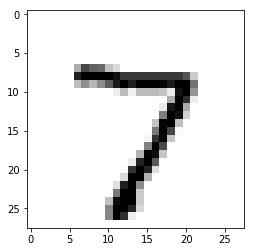

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')

### Keras will be used to build the neural network

In [18]:
import keras as kr

In [19]:
# Start a neural network, building it by layers.
model = kr.models.Sequential()

In [20]:
# # Add a hidden layer with 1000 neurons and an input layer with 784.
# model.add(kr.layers.Dense(units=1000, activation='relu', input_dim=784))
# # Add a three neuron output layer.
# model.add(kr.layers.Dense(units=10, activation='softmax'))

# # Build the graph.
# model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f:
#     train_img = f.read()

# with gzip.open('data/train-labels-idx1-ubyte.gz', 'rb') as f:
#     train_lbl = f.read()
    
# train_img = ~np.array(list(train_img[16:])).reshape(60000, 28, 28).astype(np.uint8)
# train_lbl =  np.array(list(train_lbl[ 8:])).astype(np.uint8)

# inputs = train_img.reshape(60000, 784)

# # For encoding categorical variables.
# import sklearn.preprocessing as pre

# encoder = pre.LabelBinarizer()
# encoder.fit(train_lbl)
# outputs = encoder.transform(train_lbl)

# print(train_lbl[0], outputs[0])

# model.fit(inputs, outputs, epochs=15, batch_size=10)

# with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
#     test_img = f.read()

# with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
#     test_lbl = f.read()
    
# test_img = ~np.array(list(test_img[16:])).reshape(10000, 784).astype(np.uint8)
# test_lbl =  np.array(list(test_lbl[ 8:])).astype(np.uint8)

# (encoder.inverse_transform(model.predict(test_img)) == test_lbl).sum()



## End